# Wstęp do uczenia maszynowego
##  Praca domowa nr 2
#### Jakub Piwko, Malwina Wojewoda
***
***
***

### Pakiety

In [14]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split

### Wczytanie i analiza danych

In [98]:
df = pd.read_csv('allegro-api-transactions.csv')
df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


#### Analiza braków danych

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

W ramce danych nie wystąpują wartości None/Null, więc nie będziemy musieli zajmować się uzupełnianiem brakujących wartości.

#### Rozkłady zmiennych
Pomimo, że niektóre zmienne są typu *int* i *float*, to mogą to być zmienne dyskretne/kategoryczne. Sprawdźmy to zatem:

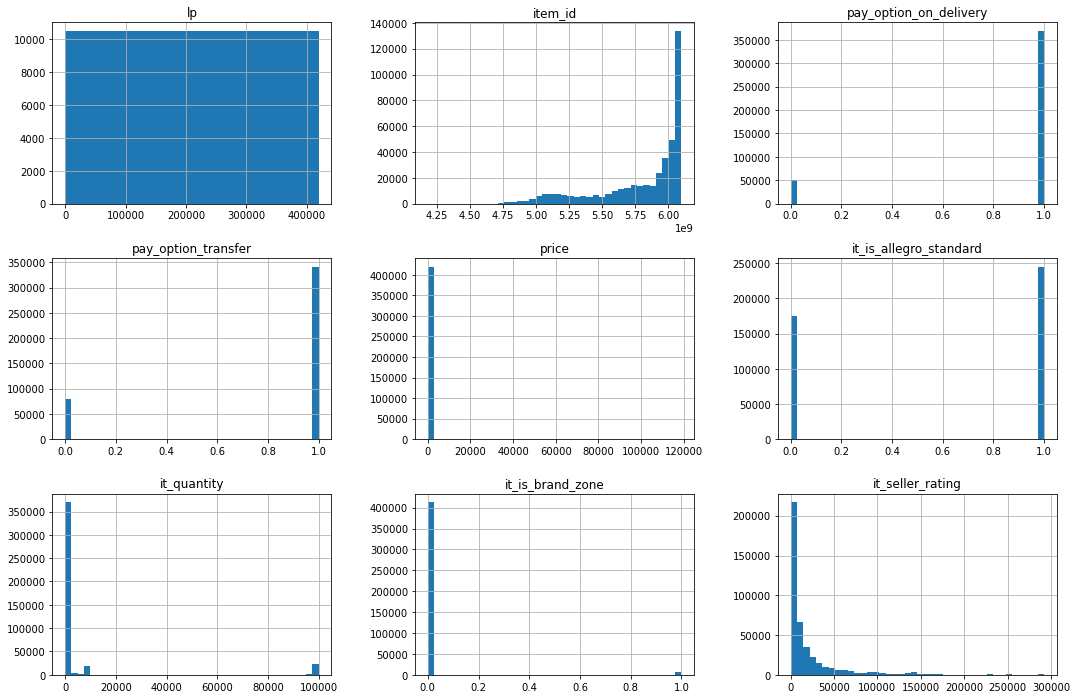

In [17]:
df.hist(figsize=(18, 12), bins=40)
plt.show()

Mimo, że z histogramu niektóre wielkości wyglądają na kategoryczne lepiej upewnic się korzystając ze zliczenia występujących wartości:

In [18]:
df['pay_option_on_delivery'].value_counts()

1    368766
0     51254
Name: pay_option_on_delivery, dtype: int64

In [19]:
df['pay_option_transfer'].value_counts()

1    341264
0     78756
Name: pay_option_transfer, dtype: int64

In [20]:
df['it_is_allegro_standard'].value_counts()

1    245063
0    174957
Name: it_is_allegro_standard, dtype: int64

In [21]:
df['it_is_brand_zone'].value_counts()

0    413008
1      7012
Name: it_is_brand_zone, dtype: int64

In [22]:
df['it_quantity'].value_counts()

0        63480
1        11349
2         8579
3         7234
4         6865
         ...  
19969        1
7997         1
3314         1
8106         1
65505        1
Name: it_quantity, Length: 7305, dtype: int64

In [23]:
df['price'].value_counts()

1.00      7904
9.99      4441
19.99     4201
99.00     3583
15.00     3393
          ... 
58.66        1
443.00       1
169.87       1
209.49       1
116.62       1
Name: price, Length: 9722, dtype: int64

Widać więc, że zmienne *pay_option_on_delivery*, *pay_option_transfer*, *it_is_allegro_standard*, *it_is_brand_zone* są kategoryczne z dwiema wartościami: 0 i 1. Natomiast zmienne *it_quantity* oraz *price* okazały się być ciągłe.

In [25]:
# NIE WIEM  W SUMIE CO Z TYMI CO MAJA TYP OBJECT

### Podział na zbiór treningowy, testowy i walidacyjny

In [89]:
#Wyróżnienie zbioru, na którym będziemy pracować i zbiory do walidacji
X, X_valid = sklearn.model_selection.train_test_split(
    df,
    test_size=0.30, random_state=100)

#Wyróżnienie zbioru treningowego i testowego
X_train, X_test = sklearn.model_selection.train_test_split(
    X,
    test_size=0.30, random_state=100)

### Zamiana zmiennych ciągłych na kategoryczne

Nie ma sensu zmienać zmiennej *item_id* ponieważ to numer identyfikujący konketną rzecz. Do zmiany pozostają zatem tylko zmienne *it_quantity*,  *it_seller_rating* oraz *price*.

##### it_guantity

Text(0.5, 1.0, 'Zmienna it_quantity')

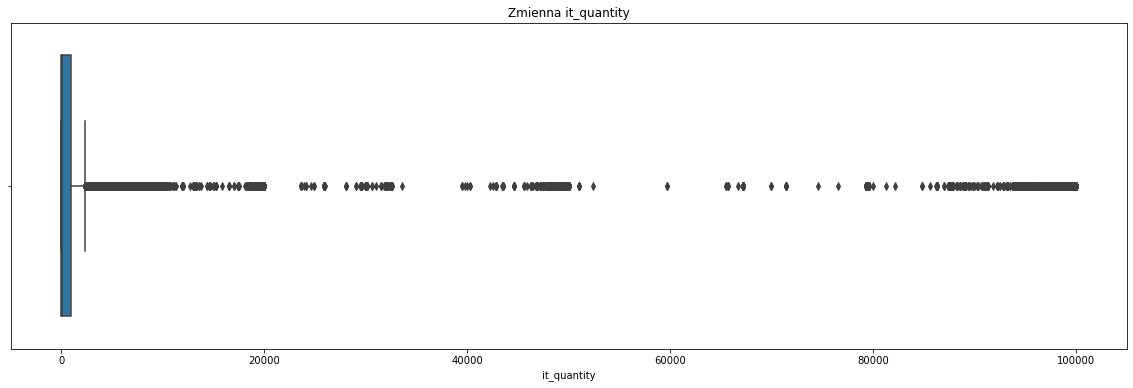

In [90]:
plt.figure(figsize=(20, 6))
box_plot = sns.boxplot(X_train['it_quantity'])
box_plot.set_title('Zmienna it_quantity')

In [91]:
X_train['it_quantity'].max()

99999

In [92]:
# NIE WIEM JAK TU PODZIELIC

Podzielimy tę zmienną na 5 grup: 
* A: 0-19 999
* B: 20 000 - 39 999
* C: 40 000 - 59 999
* D: 60 000 - 79 999
* E: 80 000 - 100 000

In [94]:
X_train['it_quantity'] = pd.cut(X_train['it_quantity'], bins=[-1, 20000, 40000, 60000, 80000, 100000], labels=['A', 'B', 'C', 'D', 'E'])

##### it_seller_rating

Text(0.5, 1.0, 'Zmienna it_seller_rating')

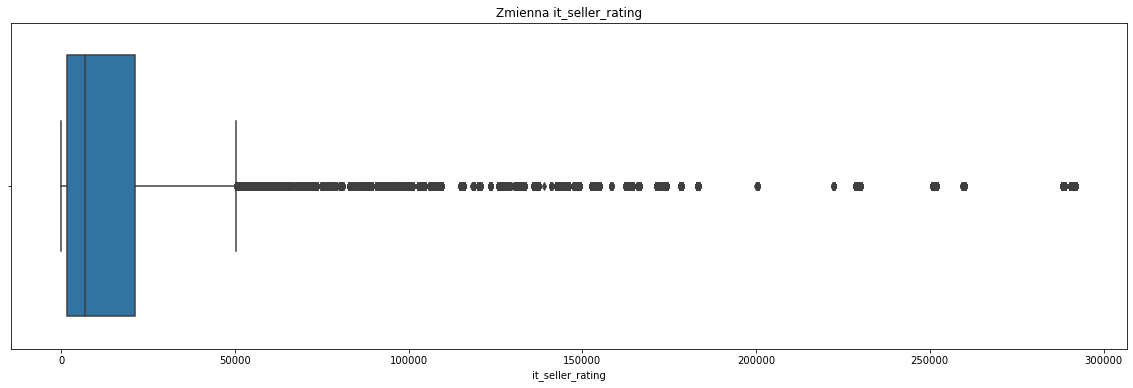

In [99]:
plt.figure(figsize=(20, 6))
box_plot = sns.boxplot(X_train['it_seller_rating'])
box_plot.set_title('Zmienna it_seller_rating')

##### price

Text(0.5, 1.0, 'Zmienna price')

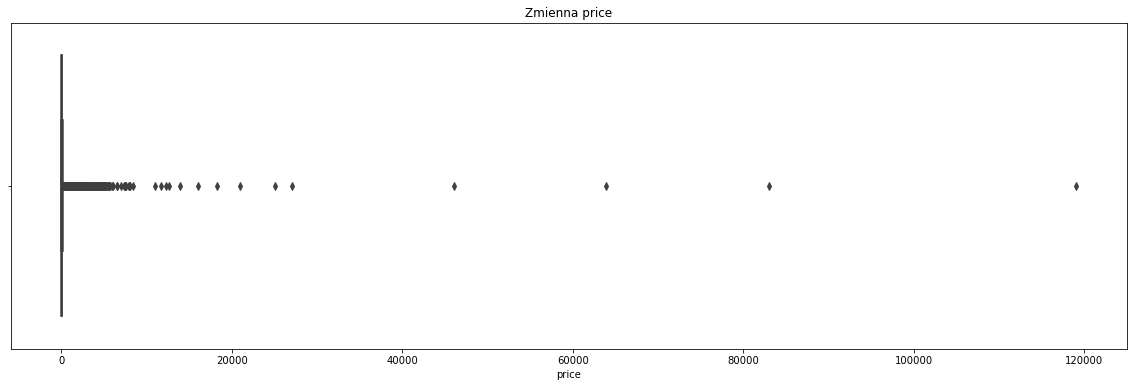

In [61]:
plt.figure(figsize=(20, 6))
box_plot = sns.boxplot(X_train['price'])
box_plot.set_title('Zmienna price')

Jeśli mamy podzielić zmienną *price* na 3 kategorie: cena wysoka, cena średnia oraz cena niska, to widać, że dane większe niż 10000 będą z pewnością zaliczać się do ostaniej grupy, ponieważ są to wartości odstające. 

In [29]:
X_train['price'].describe()

count    205809.000000
mean         76.939211
std         432.166615
min           0.000000
25%           9.000000
50%          24.990000
75%          68.000000
max      119000.000000
Name: price, dtype: float64

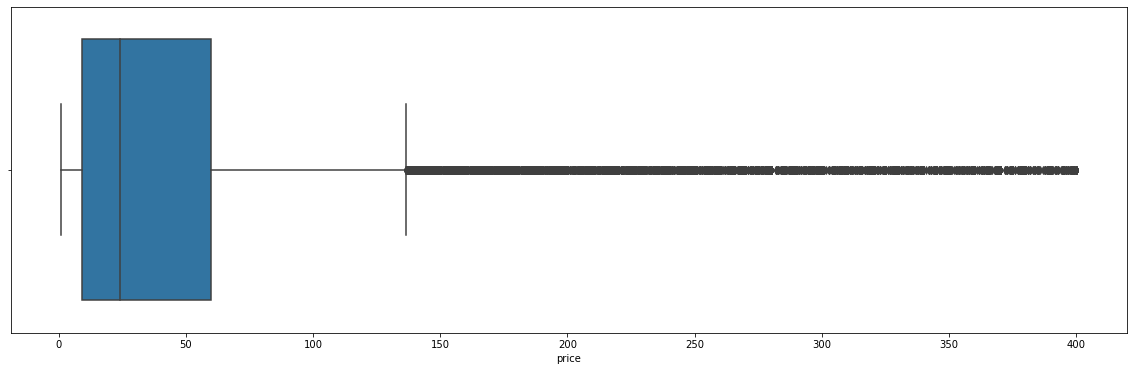

In [62]:
plt.figure(figsize=(20, 6))
tmp = X_train.loc[X_train['price'] < 400]
box_plot = sns.boxplot(tmp['price'])

In [31]:
np.percentile(X_train['price'], 90)

168.72000000000116

In [32]:
#NIE WIEM TU W SUMIE JAK DOKŁADNIE PODZIELIĆ

In [49]:
tmp = pd.cut(X_train['price'], bins=[0, 150, 1000, np.inf], labels=['niska cena', 'średnia cena', 'wysoka cena'])

In [50]:
# sprawdzamy czy przy takim podziale wstąpią jakieś braki dnaych
tmp[tmp.isna()]

206090    NaN
247789    NaN
127751    NaN
58547     NaN
8433      NaN
336570    NaN
224534    NaN
328635    NaN
182919    NaN
45669     NaN
201684    NaN
346869    NaN
12741     NaN
320207    NaN
417758    NaN
379219    NaN
Name: price, dtype: category
Categories (3, object): ['niska cena' < 'średnia cena' < 'wysoka cena']

In [51]:
#sprawdzamy dlaczego wystapiły
X_train.loc[379219, 'price']

0.0

Nie wiadomo jak interpretować cenę wynoszącą 0, zatem ze względu na to, że wartości tych jest stosunkowo niewiele lepiej je usunąć.

In [58]:
X_train = X_train[X_train.price != 0]

In [78]:
#zmiana pice na zmienną kategoryczną:
X_train['price'] = pd.cut(X_train['price'], bins=[0, 150, 1000, np.inf], labels=['niska cena', 'średnia cena', 'wysoka cena'])

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
258810,258810,2016-04-03 21:38:53,5758939933,"['Motoryzacja', 'Akcesoria samochodowe', 'Chla...",1,1,AutoCentrumSopot,niska cena,1,2,0,1017,Sopot,Motoryzacja
365240,365240,2016-04-03 11:11:25,4837911549,"['Dom i Ogród', 'Utrzymanie czystości', 'Środk...",1,1,niemchem_com,niska cena,1,110,0,52680,SZEWCE,Dom i Ogród
271612,271612,2016-04-03 20:54:46,5983284139,"['Dom i Ogród', 'Ogród', 'Narzędzia ogrodnicze...",1,1,agrowysylka,niska cena,0,3987,0,2471,Kielce,Dom i Ogród
271568,271568,2016-04-03 13:37:29,5970379539,"['Zdrowie', 'Pozostałe', 'Profesjonalne wyposa...",1,1,siima_pl,niska cena,1,22,0,837,Kraków,Zdrowie
99302,99302,2016-04-03 13:37:31,6086525489,"['Odzież, Obuwie, Dodatki', 'Odzież damska', '...",1,1,Miss_Fergee,niska cena,1,3,0,4485,Łódź,"Odzież, Obuwie, Dodatki"
362471,362471,2016-04-03 12:56:59,6028323623,"['RTV i AGD', 'AGD drobne', 'Do domu', 'Odkurz...",1,0,udane--zakupy,niska cena,0,5,0,10584,BIAŁYSTOK,RTV i AGD
278236,278236,2016-04-03 17:22:25,6045632208,"['Biżuteria i Zegarki', 'Zegarki', 'Damskie', ...",1,0,tanie_zegarki,niska cena,0,993,0,40,Ciężkowice,Biżuteria i Zegarki
12647,12647,2016-04-03 16:35:47,6077106797,"['Motoryzacja', 'Akcesoria samochodowe', 'Gadż...",1,1,FlexGraf,niska cena,1,0,0,3100,Poznań,Motoryzacja
307986,307986,2016-04-03 11:08:15,5005242449,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Nasiona',...",0,1,HURTPOL1,niska cena,0,91,0,20374,Sierpc,Dom i Ogród
269733,269733,2016-04-03 07:32:26,6020491736,"['Sport i Turystyka', 'Bieganie', 'Sprzęt pomi...",1,1,Martomzoo,niska cena,0,9905,0,7897,Zielona Góra,Sport i Turystyka
